C:\Users\jairo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


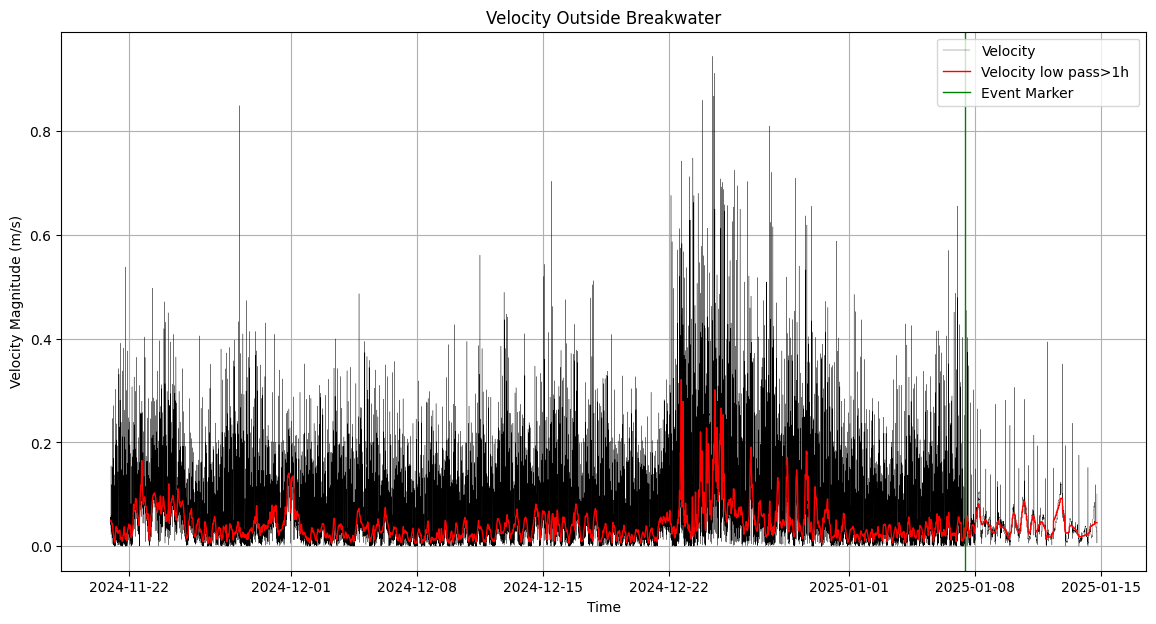

V2f - Mean: 0.0424847357449865, Median: 0.03330702, Standard Deviation: 0.0361266053995235 Max: 0.9442866, Min: 2.923713e-06
V1f - Mean: 0.0315415516469658, Median: 0.02489172, Standard Deviation: 0.024790701619054962 Max: 0.5951205, Min: 5.046e-06


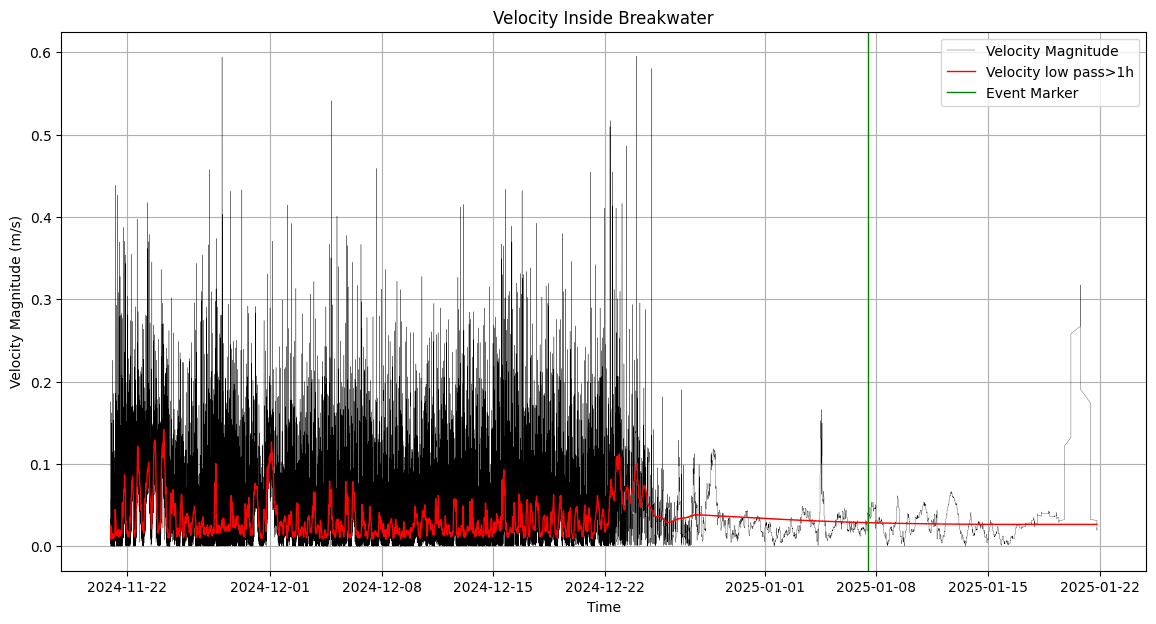

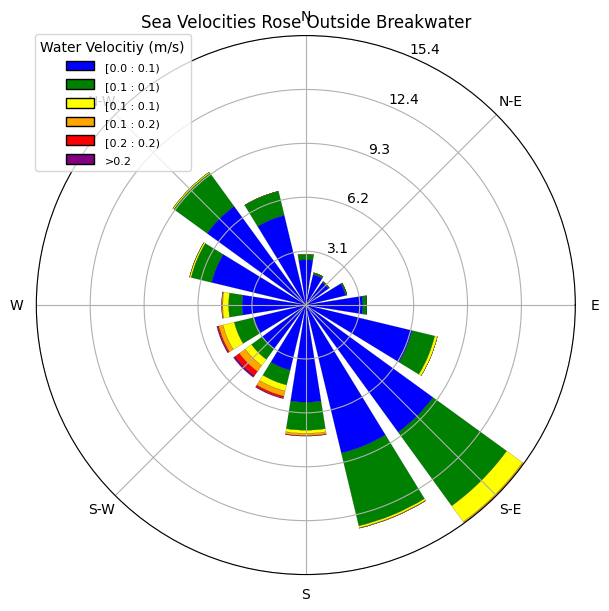

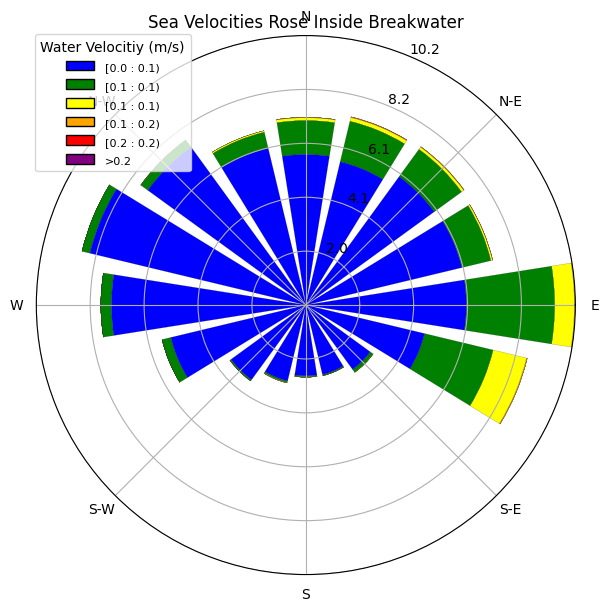

dir_filtered - Mean: 196.70576515593237, Median: 175.4475, Standard Deviation: 87.86876509353601
dir2_filtered - Mean: 176.8295586599751, Median: 164.4872, Standard Deviation: 113.09403118714503


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from scipy.signal import butter, filtfilt

Vel1= pd.read_csv(r"G:\My Drive\UCLA\Classes\Winter 2025\CEE298 Data Analysis\Project\Data\Direct measurements\velocity_data_Sarah.csv")
Vel2= pd.read_csv(r"G:\My Drive\UCLA\Classes\Winter 2025\CEE298 Data Analysis\Project\Data\Direct measurements\velocity_data_Timu.csv")
Vel1 = Vel1.dropna()
Vel2 = Vel2.dropna()
VS1f=Vel1["Velocity Magnitude (m/s)"]
VS2f=Vel2["Velocity Magnitude (m/s)"]
tVel1 = pd.to_datetime(Vel1["Timestamp"]) # Convert time to datetime format
tVel2 = pd.to_datetime(Vel2["Timestamp"]) # Convert time to datetime format

# Filter data for the specified date range
start = "2024-11-21"
end = "2025-01-22"
maskV1 = (tVel1 >= start) & (tVel1 <= end)
maskV2 = (tVel2 >= start) & (tVel2 <= end)
tV1 = tVel1[maskV1]
tV2 = tVel2[maskV2]
V1f = VS1f[maskV1]
V2f = VS2f[maskV2]

#Apply Low Pass filter

def butter_lowpass(data, cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 4 # 4 samples per second
cutoff_low = 1/3600 # Desired cutoff frequency of the filter, Hz
# Apply filters to the data
V1lp= butter_lowpass(V1f, cutoff_low, fs, order=2)
V2lp= butter_lowpass(V2f, cutoff_low, fs, order=2)


# Plotting
plt.figure(figsize=(14, 7))
plt.plot(tV2, V2f, label="Velocity", color='black', linewidth=0.2)
plt.plot(tV2, V2lp, label="Velocity low pass>1h ", color='red', linewidth=1)
plt.axvline(pd.Timestamp('2025-01-07 11:00:00'), color='green', linewidth=1, label='Event Marker')
plt.xlabel("Time")
plt.ylabel("Velocity Magnitude (m/s)")
plt.title("Velocity Outside Breakwater")
plt.legend()
plt.grid(True)
plt.show()

# Compute mean, median, and standard deviation of V2f and V1f
mean_V2f = np.mean(V2f)
median_V2f = np.median(V2f)
std_V2f = np.std(V2f)
max_V2f = np.max(V2f)
min_V2f = np.min(V2f)

mean_V1f = np.mean(V1f)
median_V1f = np.median(V1f)
std_V1f = np.std(V1f)
max_V1f = np.max(V1f)
min_V1f = np.min(V1f)

print(f"V2f - Mean: {mean_V2f}, Median: {median_V2f}, Standard Deviation: {std_V2f}", f"Max: {max_V2f}, Min: {min_V2f}")
print(f"V1f - Mean: {mean_V1f}, Median: {median_V1f}, Standard Deviation: {std_V1f}", f"Max: {max_V1f}, Min: {min_V1f}")


plt.figure(figsize=(14, 7))
plt.plot(tV1, V1f, label="Velocity Magnitude", color='black', linewidth=0.2)
plt.plot(tV1, V1lp, label="Velocity low pass>1h", color='red', linewidth=1)
plt.axvline(pd.Timestamp('2025-01-07 11:00:00'), color='green', linewidth=1, label='Event Marker')
plt.xlabel("Time")
plt.ylabel("Velocity Magnitude (m/s)")
plt.title("Velocity Inside Breakwater")
plt.legend()
plt.grid(True)
plt.show()


wind_dir2 = Vel2['Direction (degrees)'].values
dir_filtered = wind_dir2[maskV2]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="windrose")
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
colors = ['blue', 'green', 'yellow', 'orange', 'red', 'purple']
ax.bar(dir_filtered, V2f, bins=bins, normed=True, opening=0.8, edgecolor='black', colors=colors,linewidth=0.1)
# Add legend and labels
ax.set_legend(title="Water Velocitiy (m/s)", loc="upper left")
ax.set_title("Sea Velocities Rose Outside Breakwater")
plt.show()

wind_dir1 = Vel1['Direction (degrees)'].values
dir2_filtered = wind_dir1[maskV1]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="windrose")
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
colors = ['blue', 'green', 'yellow', 'orange', 'red', 'purple']
ax.bar(dir2_filtered, V1f, bins=bins, normed=True, opening=0.8, edgecolor='black', colors=colors,linewidth=0.1)
# Add legend and labels
ax.set_legend(title="Water Velocitiy (m/s)", loc="upper left")
ax.set_title("Sea Velocities Rose Inside Breakwater")
plt.show()

mean_dir_filtered = np.mean(dir_filtered)
median_dir_filtered = np.median(dir_filtered)
std_dir_filtered = np.std(dir_filtered)


mean_dir2_filtered = np.mean(dir2_filtered)
median_dir2_filtered = np.median(dir2_filtered)
std_dir2_filtered = np.std(dir2_filtered)

print(f"dir_filtered - Mean: {mean_dir_filtered}, Median: {median_dir_filtered}, Standard Deviation: {std_dir_filtered}")
print(f"dir2_filtered - Mean: {mean_dir2_filtered}, Median: {median_dir2_filtered}, Standard Deviation: {std_dir2_filtered}")





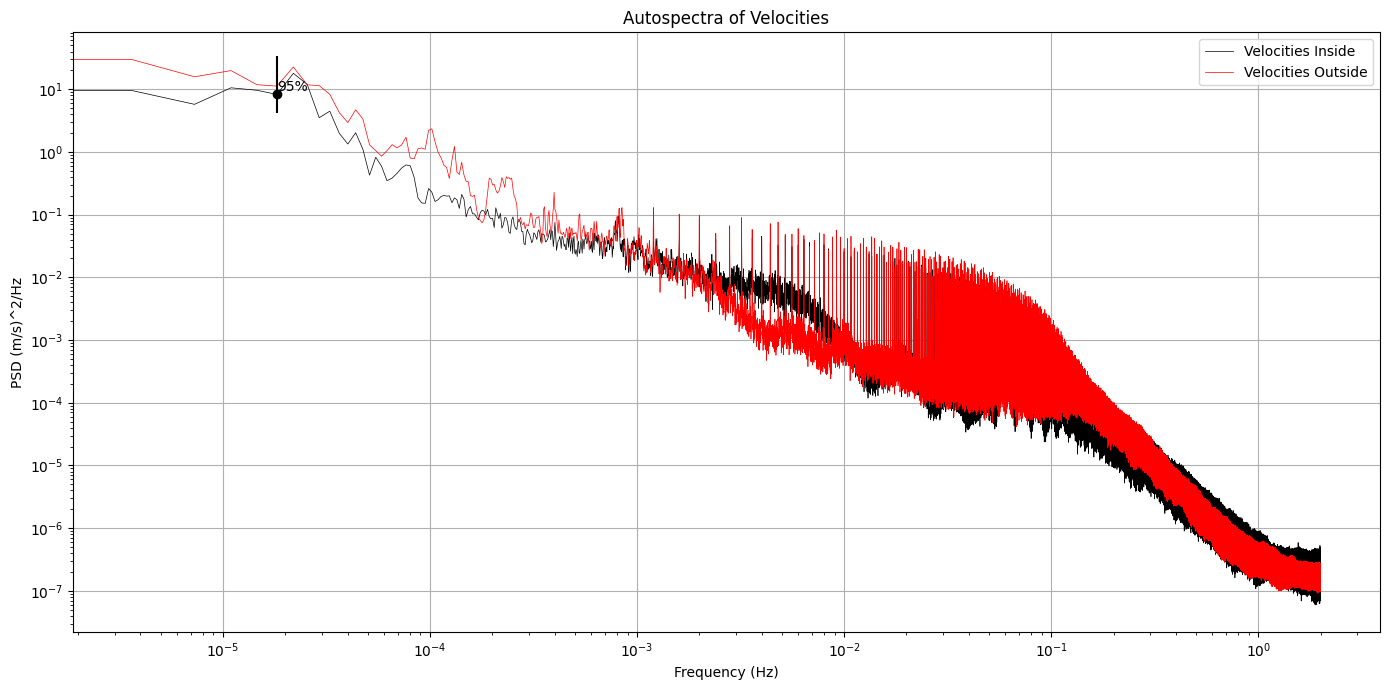

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
from scipy.stats import chi2
from scipy.signal import csd, coherence


#CROSS SPECTRAL ANALYSIS OF VELOCITIES
# Perform cross spectral analysis for Vel1 and Vel2
fs=4
dof = 10
freq, SV1V1 = csd(V1f,V1f, fs=fs, nperseg=len(V1f)/dof)
freq, SV2V2 = csd(V2f,V2f, fs=fs, nperseg=len(V1f)/dof)
freq1, SV1V2 = csd(V1f, V2f, fs=fs, nperseg=len(V1f)/dof)

# Confidence interval for spectra
alpha = 0.05 # 95% confidence interval
chi2_lower = chi2.ppf(1 - alpha/2, dof)
chi2_upper = chi2.ppf(alpha/2, dof)
ci_lower = dof / chi2_lower
ci_upper = dof / chi2_upper
mid_idx = len(freq) // 100000 # x-coordinate of  where I want to plot the error bar
mid_psd = SV1V1[mid_idx] # y-coordinate for the error bar
lower_err = ci_lower*mid_psd
upper_err = ci_upper*mid_psd
yerr = [[lower_err], [upper_err]]  # Must be 2D list for plt.errorbar()


# Plot autospectra
plt.figure(figsize=(14, 7))
plt.loglog(freq, np.abs(SV1V1), label='Velocities Inside', color='black', linewidth=0.5)
plt.loglog(freq, np.abs(SV2V2), label='Velocities Outside', color='red', linewidth=0.5)
plt.text(freq[mid_idx], mid_psd, '95%', color='black', ha='left', va='bottom')
plt.errorbar(freq[mid_idx], mid_psd, yerr=yerr, fmt='o', color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (m/s)^2/Hz')
plt.title('Autospectra of Velocities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






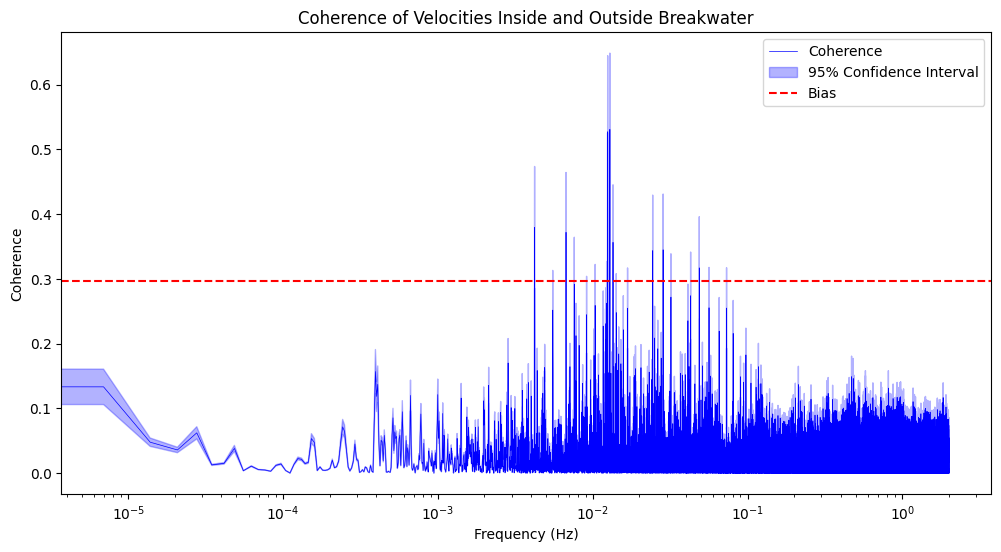

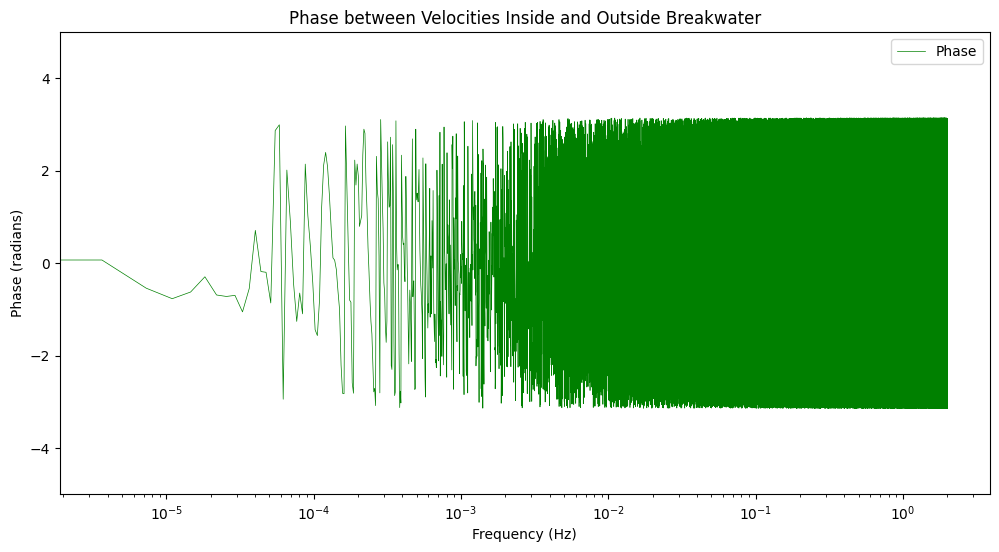

In [110]:
dof2 = 1.9*dof# if using a hanning window with 50% overlap
# compute Coherence
freq, Coh2 = signal.coherence(V1f, V2f, fs=fs, nperseg=len(V1f)/dof2)

# Calculating the bias in the coherence
bias_Coh2 = 1-0.05**(2/(dof2-2))
# Calculating confidence intervals for the coherence
std_Coh2 = np.sqrt(2)*(1-Coh2)*np.sqrt(Coh2)/np.sqrt(dof2)
Coh2_low = Coh2*(1-2*std_Coh2)
Coh2_high = Coh2*(1+2*std_Coh2)

plt.figure(figsize=(12, 6))
plt.semilogx(freq, Coh2, label='Coherence', color='blue',linewidth=0.5)
plt.fill_between(freq, Coh2_low, Coh2_high, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.axhline(y=bias_Coh2, color='red', linestyle='--', label='Bias')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.legend()
plt.title('Coherence of Velocities Inside and Outside Breakwater')
plt.show()

# Calculating the phase
phase = [math.atan2(np.imag(SV1V2[idx]),np.real(SV1V2[idx])) for idx in range(0,len(SV1V2))]


# Calculating error bars for the phase
std_phase = np.sqrt((1-Coh2)/(2*Coh2*20))
#phase_low = phase*(1-2*std_phase)
#phase_high = phase*(1+2*std_phase)

plt.figure(figsize=(12, 6))
plt.ylim(-5, 5)
plt.semilogx(freq1, phase, label='Phase', color='green',linewidth=0.5)
#plt.fill_between(freq, phase_low, phase_high, color='green', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.title('Phase between Velocities Inside and Outside Breakwater')
plt.show()

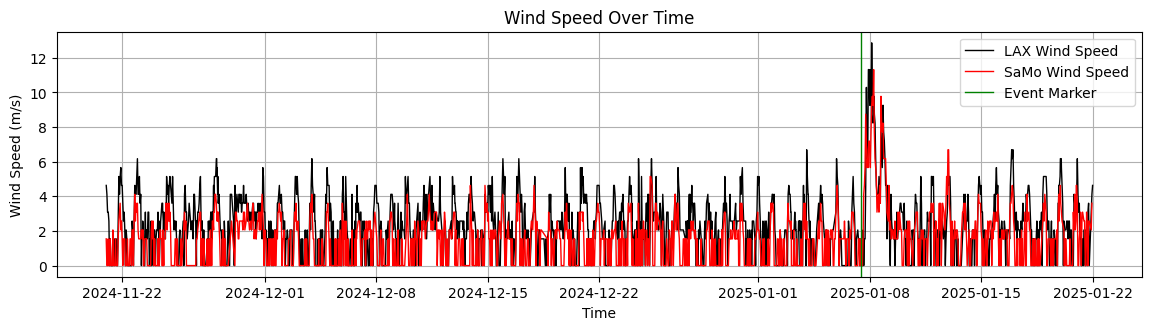

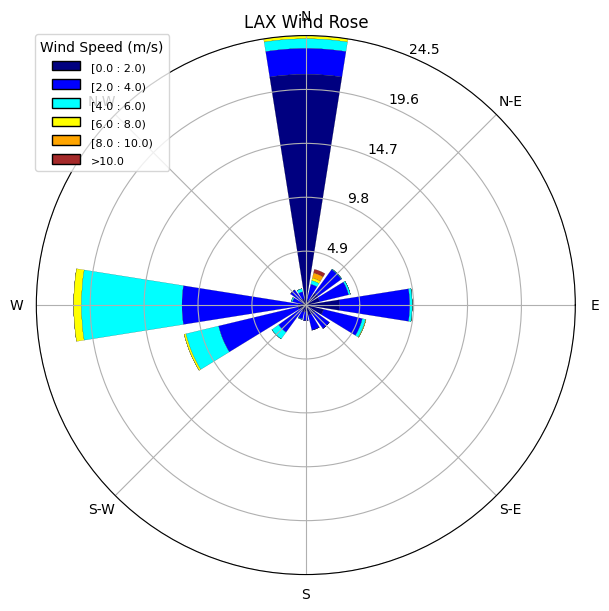

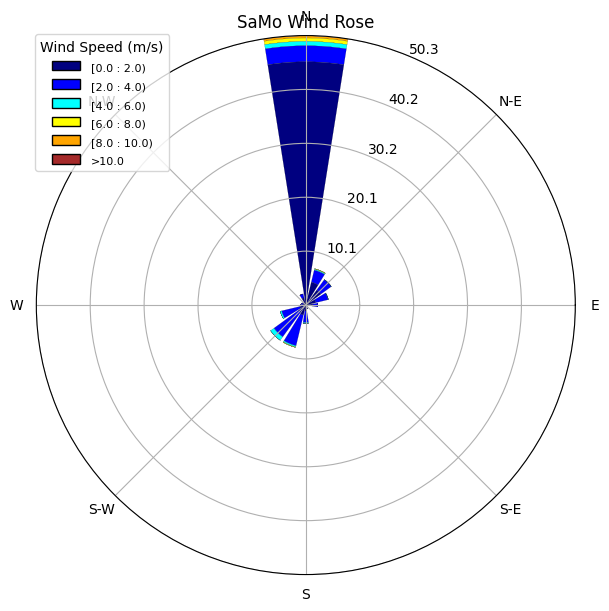

In [105]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

LAXW = pd.read_csv(r"G:\My Drive\UCLA\Classes\Winter 2025\CEE298 Data Analysis\Project\Data\Secondary Measurements\LAXWind.csv")
SaMoW= pd.read_csv(r"G:\My Drive\UCLA\Classes\Winter 2025\CEE298 Data Analysis\Project\Data\Secondary Measurements\SaMoAirportWind.csv")
LAXW= LAXW.dropna()
SaMoW= SaMoW.dropna()

time_LAXW = pd.to_datetime(LAXW["Time"]) # Convert time to datetime format
time_SaMoW = pd.to_datetime(SaMoW["Time"]) # Convert time to datetime format


# Filter wind data for the specified date range
mask_LAXW = (time_LAXW >= start) & (time_LAXW <= end)
tLAXW = time_LAXW[mask_LAXW]
VLAXW = LAXW["wind_speed"][mask_LAXW]

mask_SaMoW = (time_SaMoW >= start_date) & (time_SaMoW <= end_date)
tSaMoW = time_SaMoW[mask_SaMoW]
VSaMoW = SaMoW["wind_speed"][mask_SaMoW]

# Plotting wind data
plt.figure(figsize=(14, 7))

# Plot LAX Wind Speed
plt.subplot(2, 1, 1)
plt.plot(tLAXW, VLAXW , label="LAX Wind Speed", color='black', linewidth=1)
plt.plot(tSaMoW , VSaMoW, label="SaMo Wind Speed", color='red', linewidth=1)
plt.axvline(pd.Timestamp('2025-01-07 11:00:00'), color='green', linewidth=1, label='Event Marker')
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Over Time")
plt.legend()
plt.grid(True)



# Plotting wind rose for LAXW
wind_dir_LAXW = LAXW["wind_from_direction"].values
dir_LAXW_filtered = wind_dir_LAXW[mask_LAXW]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="windrose")
bins = [0, 2, 4, 6, 8, 10]
colors = ['navy', 'blue', 'cyan', 'yellow', 'orange', 'brown']
ax.bar(dir_LAXW_filtered, VLAXW, bins=bins, normed=True, opening=0.8, edgecolor='black', colors=colors,linewidth=0.1)
ax.set_legend(title="Wind Speed (m/s)", loc="upper left")
ax.set_title("LAX Wind Rose")
plt.show()

# Plotting wind rose for SaMoW
wind_dir_SaMoW = SaMoW["wind_from_direction"].values
dir_SaMoW_filtered = wind_dir_SaMoW[mask_SaMoW]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="windrose")
ax.bar(dir_SaMoW_filtered, VSaMoW, bins=bins, normed=True, opening=0.8, edgecolor='black', colors=colors,linewidth=0.1)
ax.set_legend(title="Wind Speed (m/s)", loc="upper left")
ax.set_title("SaMo Wind Rose")
plt.show()





C:\Users\jairo\AppData\Local\Temp\ipykernel_26848\757962696.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


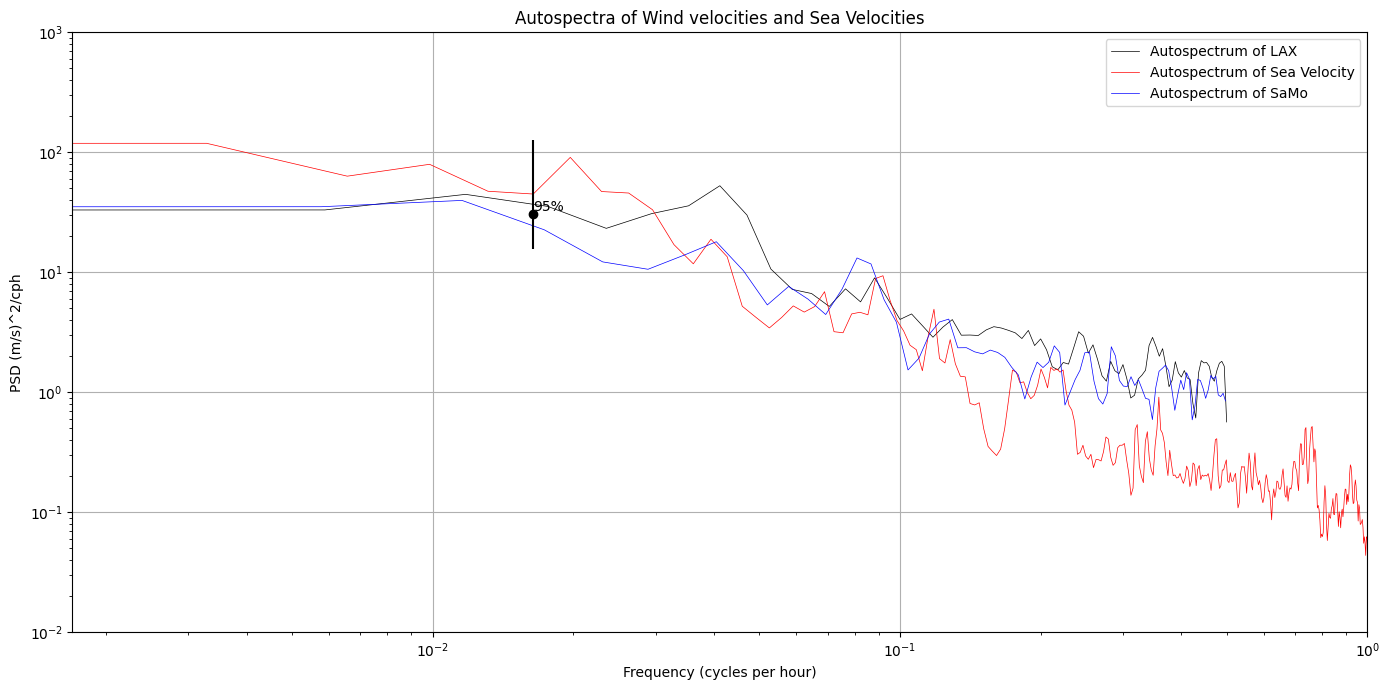

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
from scipy.stats import chi2
from scipy.signal import csd, coherence


#CROSS SPECTRAL ANALYSIS OF VELOCITIES
# Perform cross spectral analysis for V2 (Outside Breakwater) and LAX Wind Velocities
fs=1 # 1 sample per hour
dof = 10
freqw1, SW1W1 = csd(VLAXW,VLAXW, fs=fs, nperseg=len(VLAXW)/dof)
freqw2, SW2W2 = csd(VSaMoW,VSaMoW, fs=fs, nperseg=len(VSaMoW)/dof)
freq1, SW1V2 = csd(VLAXW,V2f, fs=fs, nperseg=len(VLAXW)/dof)
freq, SV2V2 = csd(V2f,V2f, fs=fs, nperseg=len(V1f)/dof)
freq= freq*3600 # Convert frequency to cph
S2V2=SV2V2/3600 # Convert to cph
 
# Confidence interval for spectra
alpha = 0.05 # 95% confidence interval
chi2_lower = chi2.ppf(1 - alpha/2, dof)
chi2_upper = chi2.ppf(alpha/2, dof)
ci_lower = dof / chi2_lower
ci_upper = dof / chi2_upper
mid_idx = len(freq) // 100000 # x-coordinate of  where I want to plot the error bar
mid_psd = SW1W1[mid_idx] # y-coordinate for the error bar
lower_err = ci_lower*mid_psd
upper_err = ci_upper*mid_psd
yerr = [[lower_err], [upper_err]]  # Must be 2D list for plt.errorbar()


# Plot autospectra
plt.figure(figsize=(14, 7))
plt.loglog(freqw1, np.abs(SW1W1), label='Autospectrum of LAX', color='black', linewidth=0.5)
plt.loglog(freq, np.abs(SV2V2), label='Autospectrum of Sea Velocity', color='red', linewidth=0.5)
plt.loglog(freqw2, np.abs(SW2W2), label='Autospectrum of SaMo', color='blue', linewidth=0.5)
plt.text(freq[mid_idx], mid_psd, '95%', color='black', ha='left', va='bottom')
plt.errorbar(freq[mid_idx], mid_psd, yerr=yerr, fmt='o', color='black')
plt.xlim(0, 1)
plt.ylim(1e-2, 1e3)
plt.xlabel('Frequency (cycles per hour)')
plt.ylabel('PSD (m/s)^2/cph')
plt.title('Autospectra of Wind velocities and Sea Velocities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


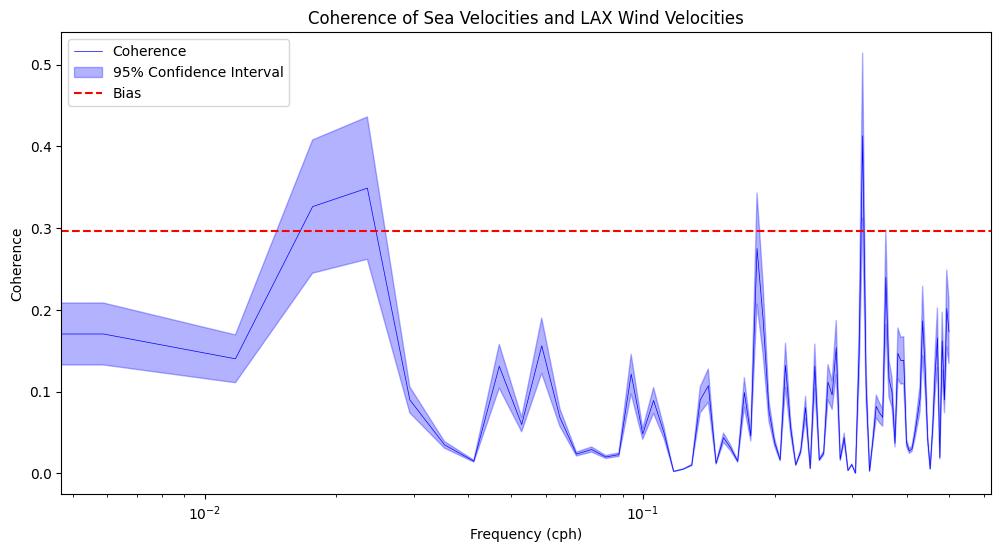

ValueError: x and y must have same first dimension, but have shapes (548064,) and (86,)

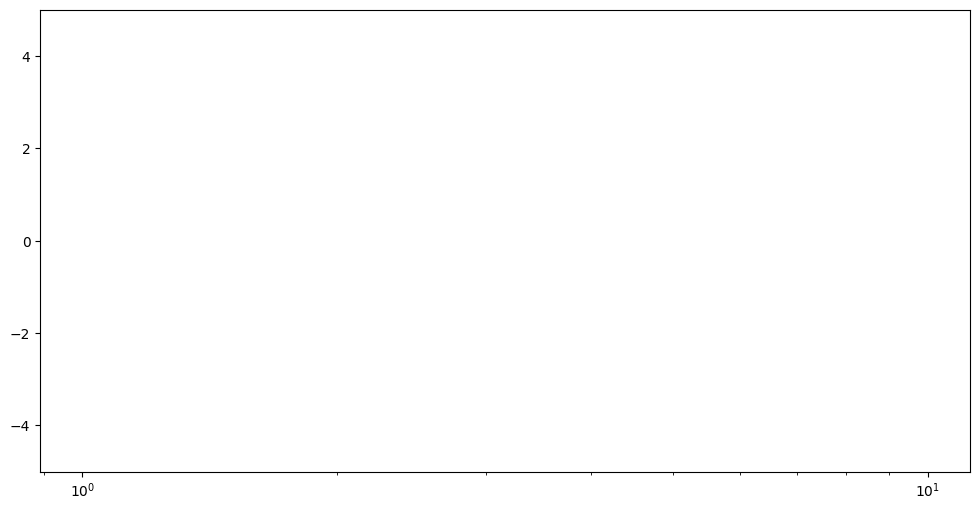

In [111]:
dof2 = 1.9*dof# if using a hanning window with 50% overlap

def compute_aligned_coherence(data1, fs1, data2, fs2, nperseg=None):
    """
    Computes coherence for two datasets with different sizes and sampling frequencies.

    Args:
        data1, data2: NumPy arrays containing the data.
        fs1, fs2: Sampling frequencies of data1 and data2, respectively.
        nperseg: Length of each segment used in the coherence calculation.

    Returns:
        f: Array of sample frequencies.
        Cxy: Coherence between x and y.
    """

    # 1. Resample to a common sampling frequency (lower of the two)
    fs_common = min(fs1, fs2)
    if fs1 != fs_common:
        num_samples = int(len(data1) * (fs_common / fs1))
        data1_resampled = signal.resample(data1, num_samples)
    else:
        data1_resampled = data1

    if fs2 != fs_common:
        num_samples = int(len(data2) * (fs_common / fs2))
        data2_resampled = signal.resample(data2, num_samples)
    else:
        data2_resampled = data2

    # 2. Truncate to equal lengths
    min_len = min(len(data1_resampled), len(data2_resampled))
    data1_aligned = data1_resampled[:min_len]
    data2_aligned = data2_resampled[:min_len]

    # 3. Compute coherence
    f, Cxy = signal.coherence(data1_aligned, data2_aligned, fs=fs_common, nperseg=nperseg)
    return f, Cxy

# Example Usage
fs1 = 1/3600  # Hz
fs2 = 4  # Hz

freq, Coh2 = compute_aligned_coherence(VLAXW, fs1, V2f, fs2, nperseg=len(VLAXW)/dof)
freq=freq*3600 # Convert frequency to cph



# Calculating the bias in the coherence
bias_Coh2 = 1-0.05**(2/(dof2-2))
# Calculating confidence intervals for the coherence
std_Coh2 = np.sqrt(2)*(1-Coh2)*np.sqrt(Coh2)/np.sqrt(dof2)
Coh2_low = Coh2*(1-2*std_Coh2)
Coh2_high = Coh2*(1+2*std_Coh2)

plt.figure(figsize=(12, 6))
plt.semilogx(freq, Coh2, label='Coherence', color='blue',linewidth=0.5)
plt.fill_between(freq, Coh2_low, Coh2_high, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.axhline(y=bias_Coh2, color='red', linestyle='--', label='Bias')
plt.xlabel('Frequency (cph)')
plt.ylabel('Coherence')
plt.legend()
plt.title('Coherence of Sea Velocities and LAX Wind Velocities')
plt.show()

# Calculating the phase
phase = [math.atan2(np.imag(SW1V2[idx]),np.real(SW1V2[idx])) for idx in range(0,len(SW1V2))]


# Calculating error bars for the phase
std_phase = np.sqrt((1-Coh2)/(2*Coh2*20))
#phase_low = phase*(1-2*std_phase)
#phase_high = phase*(1+2*std_phase)

plt.figure(figsize=(12, 6))
plt.ylim(-5, 5)
plt.semilogx(freq1, phase, label='Phase', color='green',linewidth=0.5)
#plt.fill_between(freq, phase_low, phase_high, color='green', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Frequency (cph)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.title('Phase between Sea Velocities and LAX Wind Velocities')
plt.show()

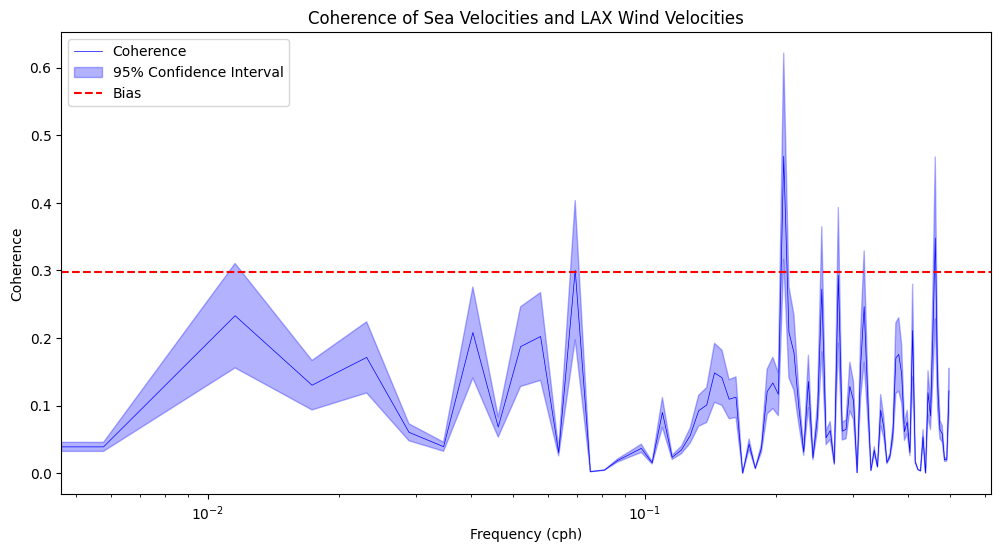

ValueError: x and y must have same first dimension, but have shapes (548064,) and (86,)

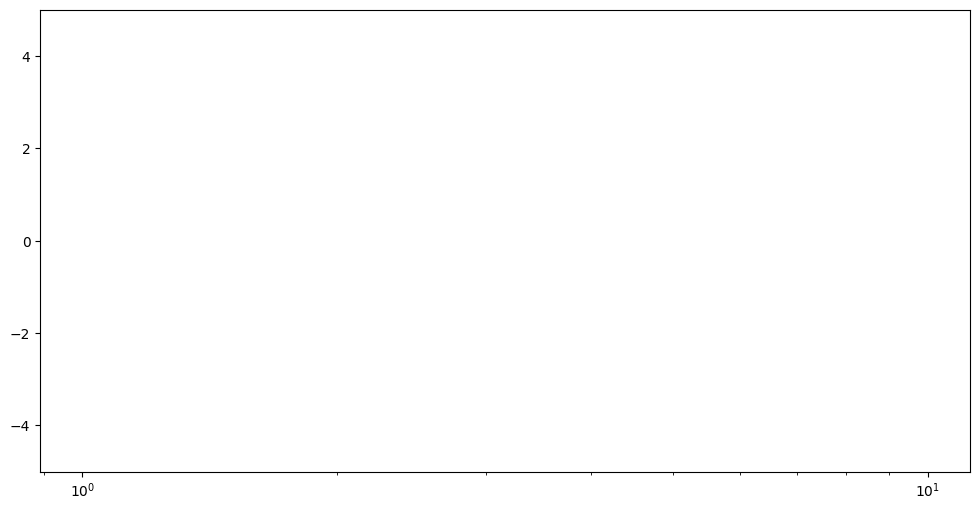

In [114]:
dof2 = 1.9*dof# if using a hanning window with 50% overlap

def compute_aligned_coherence(data1, fs1, data2, fs2, nperseg=None):
    """
    Computes coherence for two datasets with different sizes and sampling frequencies.

    Args:
        data1, data2: NumPy arrays containing the data.
        fs1, fs2: Sampling frequencies of data1 and data2, respectively.
        nperseg: Length of each segment used in the coherence calculation.

    Returns:
        f: Array of sample frequencies.
        Cxy: Coherence between x and y.
    """

    # 1. Resample to a common sampling frequency (lower of the two)
    fs_common = min(fs1, fs2)
    if fs1 != fs_common:
        num_samples = int(len(data1) * (fs_common / fs1))
        data1_resampled = signal.resample(data1, num_samples)
    else:
        data1_resampled = data1

    if fs2 != fs_common:
        num_samples = int(len(data2) * (fs_common / fs2))
        data2_resampled = signal.resample(data2, num_samples)
    else:
        data2_resampled = data2

    # 2. Truncate to equal lengths
    min_len = min(len(data1_resampled), len(data2_resampled))
    data1_aligned = data1_resampled[:min_len]
    data2_aligned = data2_resampled[:min_len]

    # 3. Compute coherence
    f, Cxy = signal.coherence(data1_aligned, data2_aligned, fs=fs_common, nperseg=nperseg)
    return f, Cxy

# Example Usage
fs1 = 1/3600  # Hz
fs2 = 4  # Hz

freq, Coh2 = compute_aligned_coherence(VSaMoW, fs1, V2f, fs2, nperseg=len(VSaMoW)/dof)
freq=freq*3600 # Convert frequency to cph



# Calculating the bias in the coherence
bias_Coh2 = 1-0.05**(2/(dof2-2))
# Calculating confidence intervals for the coherence
std_Coh2 = np.sqrt(2)*(1-Coh2)*np.sqrt(Coh2)/np.sqrt(dof)
Coh2_low = Coh2*(1-2*std_Coh2)
Coh2_high = Coh2*(1+2*std_Coh2)

plt.figure(figsize=(12, 6))
plt.semilogx(freq, Coh2, label='Coherence', color='blue',linewidth=0.5)
plt.fill_between(freq, Coh2_low, Coh2_high, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.axhline(y=bias_Coh2, color='red', linestyle='--', label='Bias')
plt.xlabel('Frequency (cph)')
plt.ylabel('Coherence')
plt.legend()
plt.title('Coherence of Sea Velocities and LAX Wind Velocities')
plt.show()

# Calculating the phase
phase = [math.atan2(np.imag(SW1V2[idx]),np.real(SW1V2[idx])) for idx in range(0,len(SW1V2))]


# Calculating error bars for the phase
std_phase = np.sqrt((1-Coh2)/(2*Coh2*20))
#phase_low = phase*(1-2*std_phase)
#phase_high = phase*(1+2*std_phase)

plt.figure(figsize=(12, 6))
plt.ylim(-5, 5)
plt.semilogx(freq1, phase, label='Phase', color='green',linewidth=0.5)
#plt.fill_between(freq, phase_low, phase_high, color='green', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Frequency (cph)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.title('Phase between Sea Velocities and LAX Wind Velocities')
plt.show()